# UTS Data Mining

In [1]:
import numpy as np
import pandas as pd 

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv")

## Exploration Data

melihat data untuk mengetahui data apa saja yang akan di klasifikasi dan mengetahui ukuran data yang akan di olah 

In [4]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [5]:
df.shape

(116, 10)

membagi data input dan data klasifikasi 

In [6]:
X = df.drop(columns=["Classification"]).values
y = df.Classification

## split dataset into train and test data 

melakukan spliting dataset digunakan untuk membagi data latih dan data uji yang nantinya akan di gunakan untuk menghitung akurasi dari model klasifikasi 

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((92, 9), (24, 9), (92,), (24,))

melakukan feature scalling agar jarak data dapat di prediksi dengan baik 

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## K - Nearest Neighbor (KNN)

membuat klasifikasi KNN dengan K = 3

In [10]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

menghitung akurasi daro model KNN

In [11]:
print("Score data latih  :", knn.score(X_train_scaled, y_train))
print("Score data uji     :", knn.score(X_test_scaled, y_test))

Score data latih  : 0.8586956521739131
Score data uji     : 0.7083333333333334


dengan menggunakan model KNN, ketika di latih data mendapatkan score sekitar 80% tetapi ketika di test dengan data uji scorenya menurun 

## Decision Tree 

membuat klasifikasi decesion tree

In [12]:
from sklearn import tree
from matplotlib import pyplot as plt
# Create DecisionTree Classifier
clf_tree = tree.DecisionTreeClassifier(criterion="entropy")
clf_tree = clf_tree.fit(X_train_scaled, y_train)

membuat design decision tree

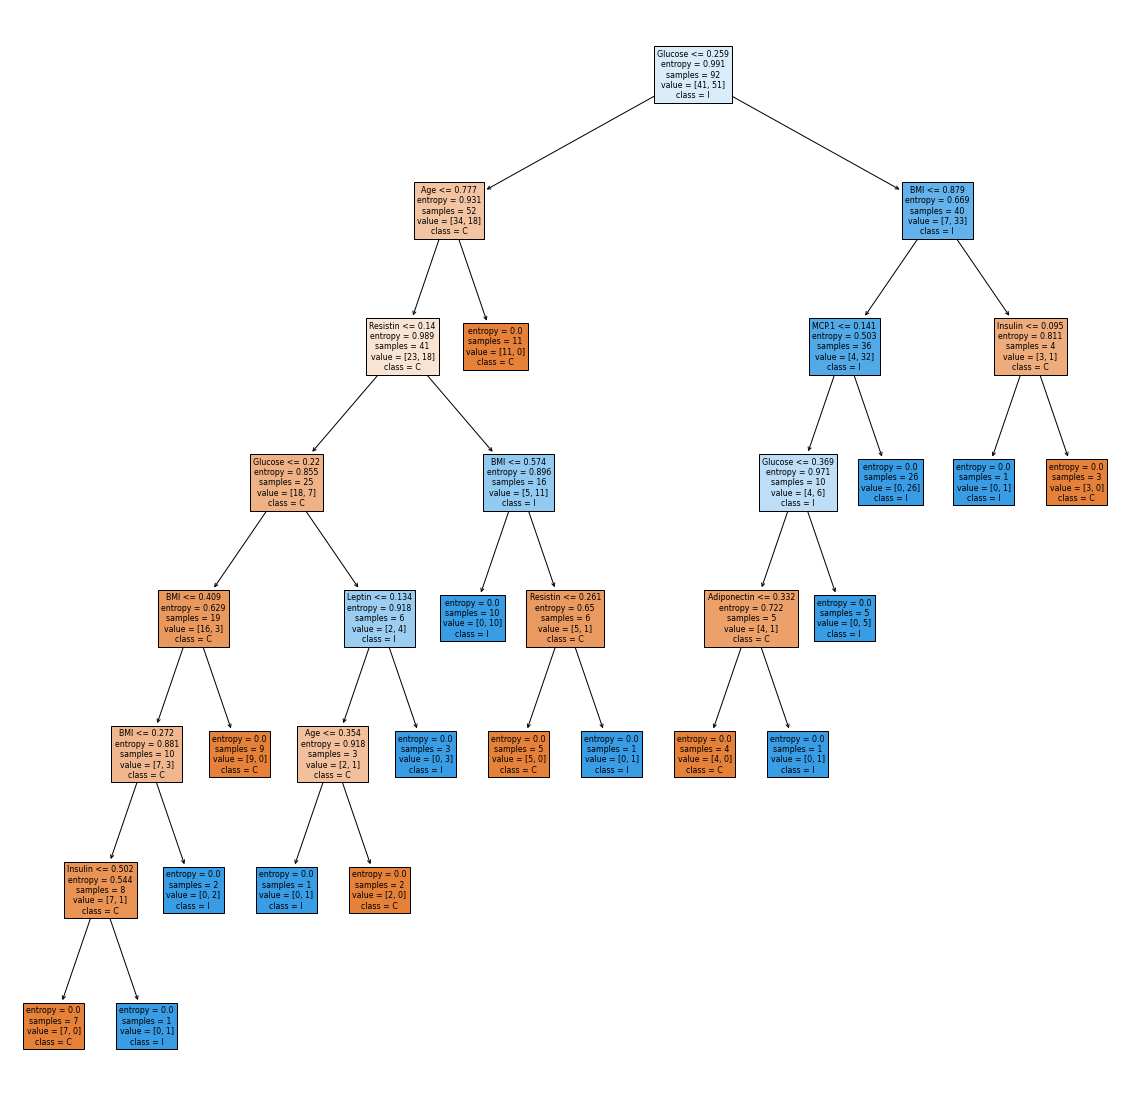

In [13]:
  fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf_tree, feature_names=list(df.columns.values)[:9], class_names=list(df.columns.values)[9] ,filled=True)

menghitung score akurasi 

In [14]:
print("Score data latih :", clf_tree.score(X_train_scaled, y_train))
print("Score data uji   :", clf_tree.score(X_test_scaled, y_test))

Score data latih : 1.0
Score data uji   : 0.6666666666666666


Dengan mnggunakan model DecisionTree, ketika di latih mendapatkan score sempurna 100%, tetapi ketika di uji dengan data uji scorenya menurun.